In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import numpy as np
import cv2
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/IS4242 Group 1")
os.getcwd()

Mounted at /content/drive


'/content/drive/.shortcut-targets-by-id/1QXRD8jLfj0PrtuIY29D8kquWN6CZD1Fm/IS4242 Group 1'

In [ ]:
fruit_types = ['Tomato', 'Orange', 'Banana', 'Apple_Red','Apple_Green', 'Pear', 'Lemon', 'Capsicum_Red', 'Capsicum_Green', 'Capsicum_Yellow']
img_types = ['jpg', 'png', 'heic', 'jpeg', 'JPG', 'PNG']

***Normal***

In [ ]:
# Set up the train data
img_dir = 'codes/data/ten_classes/train/'

X_train, y_train = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_train.append(image.flatten())
                y_train.append(class_idx)

***Augmented Images***

In [ ]:
# Set up the train data
img_dir = 'codes/data/ten_classes/augmented/'

X_train_aug, y_train_aug = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_train_aug.append(image.flatten())
                y_train_aug.append(class_idx)

***Test Images***

In [ ]:
# Set up the test data
img_dir = 'codes/data/ten_classes/val/'

X_test, y_test = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_test.append(image.flatten())
                y_test.append(class_idx)

In [ ]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f'Total train data length: {len(X_train)}')
print(f'Total augmented train data length: {len(X_train_aug)}')
print(f'\nTotal test data length: {len(X_test)}')

Total train data length: 150
Total augmented train data length: 1000

Total test data length: 50


***Model Training***

In [ ]:
# Train the random forest classifier for normal images
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Train the random forest classifier for augmented images
model_aug = RandomForestClassifier(n_estimators=100, random_state=42)
model_aug.fit(X_train_aug, y_train_aug)

# Predict the class labels for the test data
y_pred = model.predict(X_test)
y_pred_aug = model_aug.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy of the RF classifier for 100 estimators and normal images of 10 classes is {accuracy:.4f}')
accuracy_aug = accuracy_score(y_test, y_pred_aug)
print(f'\nThe accuracy of the RF classifier for 100 estimators and augmented images of 10 classes is {accuracy_aug:.4f}')


The accuracy of the RF classifier for 100 estimators and normal images of 10 classes is 0.9000

The accuracy of the RF classifier for 100 estimators and augmented images of 10 classes is 0.9200


In [ ]:
# Train the random forest classifier for normal images
model300 = RandomForestClassifier(n_estimators=300, random_state=42)
model300.fit(X_train, y_train)

# Train the random forest classifier for augmented images
model_aug300 = RandomForestClassifier(n_estimators=300, random_state=42)
model_aug300.fit(X_train_aug, y_train_aug)

# Predict the class labels for the test data
y_pred300 = model300.predict(X_test)
y_pred_aug300 = model_aug300.predict(X_test)

# Calculate the accuracy of the classifier
accuracy300 = accuracy_score(y_test, y_pred300)
print(f'\nThe accuracy of the RF classifier for 300 estimators and normal images of 10 classes is {accuracy300:.4f}')
accuracy_aug300 = accuracy_score(y_test, y_pred_aug300)
print(f'\nThe accuracy of the RF classifier for 300 estimators and augmented images of 10 classes is {accuracy_aug300:.4f}')


The accuracy of the RF classifier for 300 estimators and normal images of 10 classes is 0.9400

The accuracy of the RF classifier for 300 estimators and augmented images of 10 classes is 0.8800


In [ ]:
print(classification_report(y_test, y_pred, target_names=fruit_types))

                 precision    recall  f1-score   support

         Tomato       1.00      1.00      1.00         5
         Orange       0.83      1.00      0.91         5
         Banana       1.00      0.60      0.75         5
      Apple_Red       1.00      0.80      0.89         5
    Apple_Green       0.80      0.80      0.80         5
           Pear       1.00      1.00      1.00         5
          Lemon       1.00      1.00      1.00         5
   Capsicum_Red       1.00      1.00      1.00         5
 Capsicum_Green       0.71      1.00      0.83         5
Capsicum_Yellow       0.80      0.80      0.80         5

       accuracy                           0.90        50
      macro avg       0.91      0.90      0.90        50
   weighted avg       0.91      0.90      0.90        50



In [ ]:
print(classification_report(y_test, y_pred300, target_names=fruit_types))

                 precision    recall  f1-score   support

         Tomato       1.00      1.00      1.00         5
         Orange       0.83      1.00      0.91         5
         Banana       1.00      0.80      0.89         5
      Apple_Red       1.00      1.00      1.00         5
    Apple_Green       0.80      0.80      0.80         5
           Pear       1.00      1.00      1.00         5
          Lemon       1.00      1.00      1.00         5
   Capsicum_Red       1.00      1.00      1.00         5
 Capsicum_Green       1.00      1.00      1.00         5
Capsicum_Yellow       0.80      0.80      0.80         5

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50



In [ ]:
print(classification_report(y_test, y_pred_aug, target_names=fruit_types))

                 precision    recall  f1-score   support

         Tomato       1.00      1.00      1.00         5
         Orange       1.00      1.00      1.00         5
         Banana       0.80      0.80      0.80         5
      Apple_Red       1.00      1.00      1.00         5
    Apple_Green       1.00      0.60      0.75         5
           Pear       0.80      0.80      0.80         5
          Lemon       1.00      1.00      1.00         5
   Capsicum_Red       1.00      1.00      1.00         5
 Capsicum_Green       0.83      1.00      0.91         5
Capsicum_Yellow       0.83      1.00      0.91         5

       accuracy                           0.92        50
      macro avg       0.93      0.92      0.92        50
   weighted avg       0.93      0.92      0.92        50



In [ ]:
print(confusion_matrix(y_pred, y_test))

[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 1]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 1 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 2 0 0 0 0 0 5 0]
 [0 0 0 0 1 0 0 0 0 4]]


In [ ]:
print(confusion_matrix(y_pred_aug, y_test))

[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 1 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 1 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 1 0 0 0 5 0]
 [0 0 0 0 1 0 0 0 0 5]]


In [ ]:
path='Augmented Images/Test/'
for file_name in os.listdir(path):
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model.predict(img_flat)[0]])

Output hidden; open in https://colab.research.google.com to view.

*Accuracy for model_ten: 35/47 = 0.7447* 

In [ ]:
path='Augmented Images/Test/'
for file_name in os.listdir(path):
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model_aug.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model_aug.predict(img_flat)[0]])

Output hidden; open in https://colab.research.google.com to view.

*Accuracy for model_seven: 40/47 = 0.8511* 

In [ ]:
def test_new_img(file_name, model):
  path='Images/'
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model.predict(img_flat)[0]])

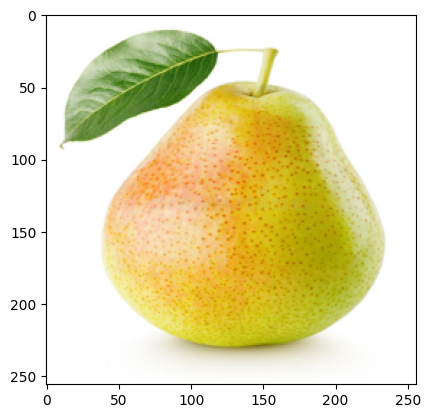

Tomato = 0.04%
Orange = 0.03%
Banana = 0.19%
Apple_Red = 0.02%
Apple_Green = 0.05%
Pear = 0.57%
Lemon = 0.05%
Capsicum_Red = 0.0%
Capsicum_Green = 0.01%
Capsicum_Yellow = 0.04%
The predicted image is : Pear


In [ ]:
test_new_img('random_forest_train/test/pear_test.jpg', model)

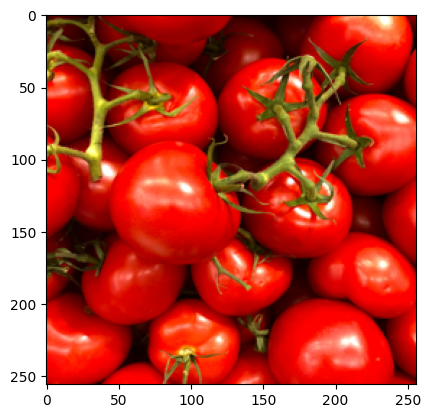

Tomato = 0.27%
Orange = 0.11%
Banana = 0.01%
Apple_Red = 0.08%
Apple_Green = 0.04%
Pear = 0.02%
Lemon = 0.04%
Capsicum_Red = 0.28%
Capsicum_Green = 0.03%
Capsicum_Yellow = 0.12%
The predicted image is : Capsicum_Red


In [ ]:
test_new_img('random_forest_train/test/tomato_test.jpg', model_aug)

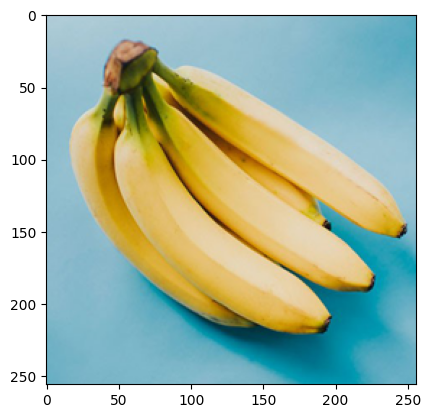

Tomato = 0.04%
Orange = 0.01%
Banana = 0.49%
Apple_Red = 0.02%
Apple_Green = 0.06%
Pear = 0.33%
Lemon = 0.0%
Capsicum_Red = 0.0%
Capsicum_Green = 0.04%
Capsicum_Yellow = 0.01%
The predicted image is : Banana


In [ ]:
test_new_img('test_svm/im1.jpeg', model_aug)

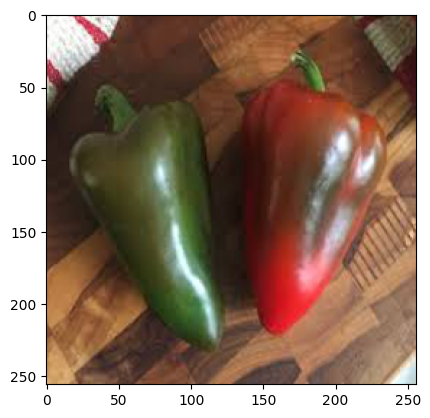

Tomato = 0.25%
Orange = 0.03%
Banana = 0.03%
Apple_Red = 0.12%
Apple_Green = 0.06%
Pear = 0.15%
Lemon = 0.04%
Capsicum_Red = 0.14%
Capsicum_Green = 0.17%
Capsicum_Yellow = 0.01%
The predicted image is : Tomato


In [ ]:
test_new_img('test_svm/im2.jpeg', model_aug)

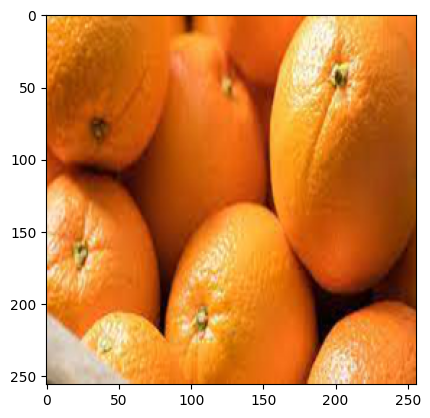

Tomato = 0.14%
Orange = 0.22%
Banana = 0.02%
Apple_Red = 0.06%
Apple_Green = 0.02%
Pear = 0.08%
Lemon = 0.15%
Capsicum_Red = 0.07%
Capsicum_Green = 0.02%
Capsicum_Yellow = 0.22%
The predicted image is : Orange


In [ ]:
test_new_img('test_svm/im3.jpeg')

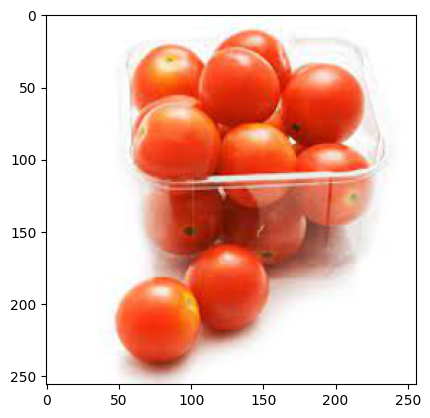

Tomato = 0.32%
Orange = 0.0%
Banana = 0.04%
Apple_Red = 0.03%
Apple_Green = 0.01%
Pear = 0.54%
Lemon = 0.02%
Capsicum_Red = 0.03%
Capsicum_Green = 0.0%
Capsicum_Yellow = 0.01%
The predicted image is : Pear


In [ ]:
test_new_img('test_svm/im4.jpeg', model_aug)

**Drafts:**

In [ ]:
from PIL import Image

# Set up the Train data
img_dir = 'Augmented Images/'
fruit_types = ['Tomato', 'Orange', 'Banana', 'Red_Apple', 'Green_Apple', 'Pear', 'Lemon']
img_types = ['jpg', 'png', 'heic', 'jpeg', 'JPG', 'PNG']
data_by_fruit = {fruit_type: ([], []) for fruit_type in fruit_types}

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = np.array(image.resize((256, 256))) # Resizing
                data_by_fruit[class_name][0].append(image.flatten())
                data_by_fruit[class_name][1].append(class_idx)

X_train, y_train = [], []

for class_name in fruit_types:
  Xtemp, ytemp = data_by_fruit[class_name]
  X_train = Xtemp
  y_train = ytemp  
  print(f'{class_name} data length: {len(data_by_fruit[class_name][0])}')

Tomato data length: 100
Orange data length: 100
Banana data length: 100
Red_Apple data length: 100
Green_Apple data length: 100
Pear data length: 100
Lemon data length: 100


In [ ]:
# Set up the Test data
img_dir = 'Augmented Images/Test'
fruit_types = ['Tomato', 'Orange', 'Banana', 'Red_Apple', 'Green_Apple', 'Pear', 'Lemon']
img_types = ['jpg', 'png', 'heic', 'jpeg', 'JPG', 'PNG']
data_by_fruit = {fruit_type: ([], []) for fruit_type in fruit_types}

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = np.array(image.resize((256, 256))) # Resizing
                data_by_fruit[class_name][0].append(image.flatten())
                data_by_fruit[class_name][1].append(class_idx)

X_train, y_train = [], []

for class_name in fruit_types:
  Xtemp, ytemp = data_by_fruit[class_name]
  X_train = Xtemp
  y_train = ytemp  
  print(f'{class_name} data length: {len(data_by_fruit[class_name][0])}')


X_test, y_test = [], []



X_test = 
y_test = 

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(f'\nTotal train data length: {len(X_train)}')
print(f'Total test data length: {len(X_test)}')

# Train the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy of the RF classifier is {accuracy:.4f}')

In [ ]:
X_train, y_train = [], []
X_test, y_test = [], []

for class_name in fruit_types:
  Xtemp, ytemp = data_by_fruit[class_name]
  split_idx = int(0.8 * len(Xtemp))
  X_train += Xtemp[:split_idx]
  y_train += ytemp[:split_idx]
  X_test += Xtemp[split_idx:]
  y_test += ytemp[split_idx:]
  print(f'{class_name} data length: {len(Xtemp)}')

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(f'\nTotal train data length: {len(X_train)}')
print(f'Total test data length: {len(X_test)}')

# Train the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy of the RF classifier is {accuracy:.4f}')


Tomato data length: 100
Orange data length: 100
Banana data length: 100
Red_Apple data length: 100
Green_Apple data length: 100
Pear data length: 100
Lemon data length: 100
Capsicum data length: 100

Total train data length: 640
Total test data length: 160

The accuracy of the RF classifier is 0.9437


In [ ]:
# Set up the train data
img_dir = 'codes/data/ten_classes/augmented/'
fruit_types = ['Tomato', 'Orange', 'Banana', 'Apple_Red', 'Apple_Green', 'Pear', 'Lemon', 'Capsicum_Red', 'Capsicum_Green','Capsicum_Yellow']
img_types = ['jpg', 'png', 'heic', 'jpeg', 'JPG', 'PNG']
data_by_fruit = {fruit_type: ([], []) for fruit_type in fruit_types}

X_train_ten, y_train_ten = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                data_by_fruit[class_name][0].append(image.flatten())
                data_by_fruit[class_name][1].append(class_idx)

for class_name in fruit_types:
  Xtemp, ytemp = data_by_fruit[class_name]
  X_train_ten += Xtemp
  y_train_ten += ytemp  
  print(f'{class_name} <Train> data length: {len(data_by_fruit[class_name][0])}')


Tomato <Train> data length: 100
Orange <Train> data length: 100
Banana <Train> data length: 100
Apple_Red <Train> data length: 100
Apple_Green <Train> data length: 100
Pear <Train> data length: 100
Lemon <Train> data length: 100
Capsicum_Red <Train> data length: 100
Capsicum_Green <Train> data length: 100
Capsicum_Yellow <Train> data length: 100
